# 256. Axes Grid : [Inset Locator Demo](https://matplotlib.org/gallery/axes_grid1/inset_locator_demo.html)

NO.|Gallery|number
--|--|--
1|Lines, bars and markers|44
2|Images, contours and fields|42
3|Subplots, axes and figures|30
4|Statistics|20
5|Pie and polar charts|9
6|Text, labels and annotations|42
7|Pyplot|25
8|Color|8
9|Shapes and collections|16
10|Style sheets|7
11|Axes Grid|27

In [4]:
44 + 42 +30 + 20 + 9 + 42 + 25 + 8 + 16 + 7 + 13

256

# Matplotlib示例.256 如何绘制画中画效果？

The inset_locator's inset_axes allows easily placing insets in the corners of the axes by specifying a width and height and optionally a location (loc) that accepts locations as codes, similar to legend. By default, the inset is offset by some points from the axes, controlled via the borderpad parameter.

在实践5中，想要实现局部放大的效果，脑补一下放大镜。所以今天学习示例256

matplotlib为我们提供了实现插图效果的简易方法，inset_locator的inset_axes函数。

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

inset_axes与常见的方法不同，它在工具集中，从命名上就能看出有显著的差异。

In [2]:
%matplotlib widget

In [3]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=[5.5, 2.8])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
axins = inset_axes(ax, width=1.3, height=0.9)

Create inset of width 1.3 inches and height 0.9 inches at the default upper right location

先不急着查API，先盲猜一下，inset_axes会在ax坐标空间创建一个宽1.3高0.9的插图。猜不到的是1.3和0.9是什么单位，插图的位置又在哪。

(查API，缺省位置右上，单位英寸。)

In [7]:
axins2 = inset_axes(ax, width="30%", height="40%", loc=3)

Create inset of width 30% and height 40% of the parent axes' bounding box at the lower left corner (loc=3)

百分比是另一种可接受的样式，它是相对于ax的bbox的比例，3是位置的数字编号

```
'upper right'  : 1,
'upper left'   : 2,
'lower left'   : 3,
'lower right'  : 4,
'right'        : 5,
'center left'  : 6,
'center right' : 7,
'lower center' : 8,
'upper center' : 9,
'center'       : 10
```

（这与legend的位置相同，应该是在offsetbox中定义的）

In [ ]:
# Create inset of mixed specifications in the second subplot;
# width is 30% of parent axes' bounding box and
# height is 1 inch at the upper left corner (loc=2)
axins3 = inset_axes(ax2, width="30%", height=1., loc=2)

混合使用也成立。

In [ ]:
# Create an inset in the lower right corner (loc=4) with borderpad=1, i.e.
# 10 points padding (as 10pt is the default fontsize) to the parent axes
axins4 = inset_axes(ax2, width="20%", height="20%", loc=4, borderpad=1)

Padding between inset axes and the bbox_to_anchor. Defaults to 0.5. The units are axes font size, i.e. for a default font size of 10 points borderpad = 0.5 is equivalent to a padding of 5 points.

一个新参数borderpad

在插图坐标空间与bbox_to_anchor之间填充。默认值是0.5 单位是axes的字体尺寸，默认字体尺寸是10points，所以borderpad=0.5等于填充5points



- bbox是什么？

bounding box，是一个 Rectangle 实例

- bbox_to_anchor又是什么？

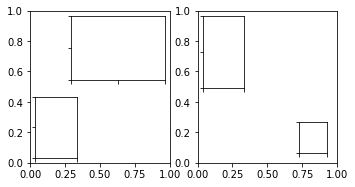

In [3]:
# Turn ticklabels of insets off
for axi in [axins, axins2, axins3, axins4]:
    axi.tick_params(labelleft=False, labelbottom=False)

----

The arguments bbox_to_anchor and bbox_transfrom can be used for a more fine grained control over the inset position and size or even to position the inset at completely arbitrary positions. The bbox_to_anchor sets the bounding box in coordinates according to the bbox_transform.

参数bbox_to_anchor和bbox_transfrom可以用于对插入位置和大小进行更细粒度的控制，甚至可以将插入位置定位在完全任意的位置。 bbox_to_anchor根据bbox_transform在坐标中设置边界框。

In [15]:
fig = plt.figure(figsize=[5.5, 2.8])
ax = fig.add_subplot(121)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

We use the axes transform as bbox_transform. Therefore the bounding box
needs to be specified in axes coordinates ((0, 0) is the lower left corner
of the axes, (1, 1) is the upper right corner).
The bounding box (.2, .4, .6, .5) starts at (.2, .4) and ranges to (.8, .9)
in those coordinates.
Inside of this bounding box an inset of half the bounding box' width and
three quarters of the bounding box' height is created. The lower left corner
of the inset is aligned to the lower left corner of the bounding box (loc=3).
The inset is then offset by the default 0.5 in units of the font size.

transform 是盲区！

In [14]:
%matplotlib widget

In [16]:
axins = inset_axes(ax, width="50%", height="75%",
                   bbox_to_anchor=(.2, .4, .6, .5),
                   bbox_transform=ax.transAxes, loc=3)

In [17]:
# For visualization purposes we mark the bounding box by a rectangle
ax.add_patch(plt.Rectangle((.2, .4), .6, .5, ls="--", ec="c", fc="None",
                           transform=ax.transAxes))

In [18]:
# We set the axis limits to something other than the default, in order to not
# distract from the fact that axes coordinates are used here.
ax.set(xlim=(0, 10), ylim=(0, 10))

[(0, 10), (0, 10)]

In [19]:
# Note how the two following insets are created at the same positions, one by
# use of the default parent axes' bbox and the other via a bbox in axes
# coordinates and the respective transform.
ax2 = fig.add_subplot(222)
axins2 = inset_axes(ax2, width="30%", height="50%")

In [20]:
ax3 = fig.add_subplot(224)
axins3 = inset_axes(ax3, width="100%", height="100%",
                    bbox_to_anchor=(.7, .5, .3, .5),
                    bbox_transform=ax3.transAxes)

In [21]:
# For visualization purposes we mark the bounding box by a rectangle
ax2.add_patch(plt.Rectangle((0, 0), 1, 1,     ls="--", lw=2, ec="c", fc="None"))
ax3.add_patch(plt.Rectangle((.7, .5), .3, .5, ls="--", lw=2, ec="c", fc="None"))

In [22]:
# Turn ticklabels off
for axi in [axins2, axins3, ax2, ax3]:
    axi.tick_params(labelleft=False, labelbottom=False)

----

In the above the axes transform together with 4-tuple bounding boxes has been used as it mostly is useful to specify an inset relative to the axes it is an inset to. However other use cases are equally possible. The following example examines some of those.

In [23]:
fig = plt.figure(figsize=[5.5, 2.8])
ax = fig.add_subplot(131)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
# Create an inset outside the axes
axins = inset_axes(ax, width="100%", height="100%",
                   bbox_to_anchor=(1.05, .6, .5, .4),
                   bbox_transform=ax.transAxes, loc=2, borderpad=0)

In [25]:
axins.tick_params(left=False, right=True, labelleft=False, labelright=True)

In [ ]:



axins.tick_params(left=False, right=True, labelleft=False, labelright=True)

# Create an inset with a 2-tuple bounding box. Note that this creates a
# bbox without extent. This hence only makes sense when specifying
# width and height in absolute units (inches).
axins2 = inset_axes(ax, width=0.5, height=0.4,
                    bbox_to_anchor=(0.33, 0.25),
                    bbox_transform=ax.transAxes, loc=3, borderpad=0)


ax2 = fig.add_subplot(133)
ax2.set_xscale("log")
ax2.set(xlim=(1e-6, 1e6), ylim=(-2, 6))

# Create inset in data coordinates using ax.transData as transform
axins3 = inset_axes(ax2, width="100%", height="100%",
                    bbox_to_anchor=(1e-2, 2, 1e3, 3),
                    bbox_transform=ax2.transData, loc=2, borderpad=0)

# Create an inset horizontally centered in figure coordinates and vertically
# bound to line up with the axes.
from matplotlib.transforms import blended_transform_factory
transform = blended_transform_factory(fig.transFigure, ax2.transAxes)
axins4 = inset_axes(ax2, width="16%", height="34%",
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=transform, loc=8, borderpad=0)